# Sigma Derivation

## References

1. [https://en.wikipedia.org/wiki/Complex_random_variable](https://en.wikipedia.org/wiki/Complex_random_variable)
2. [https://mrimaster.com/snr/](https://mrimaster.com/snr/)
3. [https://en.wikipedia.org/wiki/Uncertainty_principle](https://en.wikipedia.org/wiki/Uncertainty_principle)

## Signal-to-Noise Ratio measure 

The $SNR$ of a given MRS signal can be measured as:

$$SNR = \frac{P}{\sigma}$$

With $P$ and $\sigma$ being:

$P$ : peak of the signal.

$\sigma$ : standard deviation of the noise.

For an estimation of the $\sigma$ necessary to give a desired $SNR$, it is needed to first know the peak value of the signal. If the $SNR$ is calculated in the FID space, then the peak will always be the value of the intensity of the signal at $t = 0$.

The thing is, the $\sigma$ calculated will be the standard deviation of the magnitude of the signal, but it would be desired to know its value for the real and iamginary part. In this application, it is expected that the standard deviation of the real part will be the same as the imaginary one, $\sigma_r = \sigma_i = \sigma_c$, so this would make these calculations easier, however, even if the same, the relation between the standard deviation of the magnitude and the standard deviation of the real and imaginary parts are not explicit, as it can be seen below.

## Variance of $Z$

According to wikipedia, the variance of a complex number is:

$$Var[Z] = E[|Z|^2] - |E[Z]|^2$$

We can then relate this to the variance of its module, $|Z|$:

$$Var[|Z|] = E[|Z|^2] - E[|Z|]^2$$

$$E[|Z|^2] = Var[|Z|^2] + E[|Z|]^2$$

Then:

$$Var[Z] = Var[|Z|^2] + E[|Z|]^2 - |E[z]|^2$$

The variance of a complex number can also be understood as:

$$Var[Z] = Var[\mathcal{Re}(Z)] + Var[\mathcal{Im}(Z)]$$

$$Var[\mathcal{Re}(Z)] + Var[\mathcal{Im}(Z)] = Var[|Z|^2] + E[|Z|]^2 - |E[Z]|^2$$

If the variance of the real and imaginary part are the same:

$$Var[\mathcal{Re}(Z)] = Var[\mathcal{Im}(Z)] = \sigma_c^2$$

$$Var[|Z|^2] = \sigma^2$$

Then:

$$2\sigma_c^2 = \sigma^2 + E[|Z|]^2 - |E[Z]|^2$$

$$\sigma_c = \frac{\sqrt{\sigma^2 + E[|Z|]^2 - |E[Z]|^2}} { \sqrt{2} }$$


Based on the above $SNR$ definition, it can be rewritten as:

$$\sigma_c = \frac{\sqrt{(\frac{P}{SNR})^2 + E[|Z|]^2 - |E[Z]|^2}} { \sqrt{2} }$$

By an statistical approach, the above relation is found. This relation is circular, as $Z$ depends on $\sigma_c$, and $\sigma_c$ is dependant on the signal itself, so it does not seem to make sense to follow that path.

## SNR in the frequency domain

The $SNR$ in the frequency domain is calculated in the same way.

$$SNR = \frac{P}{\sigma_f}$$

With $\sigma_f$ being the standard deviation of the noise, calculated in a region of the signal where peaks are not expected. If measured in this domain, it is important to take into account the relation between the standard deviation in the frequency domain and in the time domain, which is based on the [uncertainty principle](https://en.wikipedia.org/wiki/Uncertainty_principle):

$$\sigma_t \cdot \sigma_f \geq \frac{1}{4\pi}$$

This states that one SD limits the other, and their relation is not exact, meaning one can't be used to find exactly the other.

## Account manipulations


$$Z = S + N$$

$$E[Z] = E[S + N] = E[S] + E[N]$$

$$|E[Z]|^2 = E[Z] \overline{E[Z]} = (E[S] + E[N]) (\overline{E[S] + E[N]}) = E[S]\overline{E[S]} + E[S]\overline{E[N]}+ \overline{E[S]}E[N] + E[N]\overline{E[N]}$$

$$|E[Z]|^2 = |E[S]|^2 + E[S]\overline{E[N]}+ \overline{E[S]}E[N] + |E[N]|^2$$

Pela simetria circular:

$$E[S] = E[|S|e^{-i\psi}] = e^{-i\psi}E[|S|]$$

Portanto:

$$|E[S]|^2 = e^{-i\psi}e^{i\psi}E[|S|]^2 = E[|S|]^2$$

Então:

$$|E[Z]|^2 = E[|S|]^2 + E[S]\overline{E[N]}+ \overline{E[S]}E[N] + |E[N]|^2$$

$$E[|Z|^2] = E[|S + N|^2]$$


$$|S + N|^2 = (S + N)\overline{(S + N)} = (S + N)(\overline{S} + \overline{N}) = S\overline{S} + S\overline{N} + \overline{S}N + N\overline{N}$$

$$S\overline{S} + S\overline{N} + \overline{S}N + N\overline{N} = |S|^2 + 2Re(S\overline{N}) + |N|^2$$

Which can be rewritten as:

$$ \sigma_c^2 = \frac{ \sigma^2 + E[|Z|]^2 - |E[Z]|^2 }{2} $$

$|E[Z]|^2$ can be rewritten as:

$$|E[Z]|^2 = \alpha$$

So:

$$ \sigma_c(\alpha)^2 = \frac{ \sigma^2 + E[|Z|]^2 - \alpha }{2} $$

## Conclusions

After some frustrated tries at finding an explicit relation between $\sigma_c$ and $\sigma$, the conclusion that can be obtained is that it is hard to relate the $SNR$ and $\sigma_c$ without having the already generated signal. It is also hard to relate the SD in the time and frequency domain. 

# Sigma Estimation

As an analytical relation could not be found, a more empirical approach is taken. By varying the value of the SD that generates the white noise in the real part of the FID, the SD of the noise of the magnitude FID is calculated, as the SD of the noise of its FT, to see how it behaves. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, fftfreq, fftshift
import pandas as pd
import pyMRI.pymri as pymri
from pyMRI.utils import RMSE

In [2]:
rerun = False
hist = False
filename_end = "relations"

First, the metabolites informations are imported.

In [3]:
metabolites = pymri.METABOLITES

The simulation parameters are set:

In [4]:
sampling_f = 100000 # cycles/s -> 2000 cycles/s -> 2048 points
t0 = 0.0
tn = 1.0
Dt = tn - t0
dt = 1.0/(sampling_f)
B0 = 3.0

In [5]:
deltas = np.array(list(metabolites.values()))[:, 0]
t2s = np.array(list(metabolites.values()))[:, 1]
M_0s = np.array(list(metabolites.values()))[:, 2]
spins_phi = np.zeros_like(deltas)
ws = pymri.hz_to_rad(pymri.f_from_chem_shift(deltas, B0) )

print( pymri.rad_to_hz(ws) )
print( "All frequencies are captured by the sampling rate." if pymri.check_frequency(ws, dt) == True 
      else f"At least one frequency is NOT captured by the sampling rate")

[374.84360487 383.83596833 397.33728675 397.97594892 418.92406833
 428.50400098 515.52810921 539.03087732 543.75697743 584.00546781
 593.45766803 611.35298223 632.42883407 654.4115862 ]
All frequencies are captured by the sampling rate.


For these calculations, the peak of the FID signal is measured first, so it is held constant the whole simulation, not being influenced by the noise artificial peaks.

In [6]:
sig, t = pymri.population_transverse_decay(0.0, 1.0, 1.0, (ws, t2s, M_0s, spins_phi), np.array([]))

P = np.abs(sig)[0]
print(P)

2.4412


The corruption simulation is then ran, so the sigma behavior is well mapped. For a sample of SDs generating a noise (in this case, gaussian) in the real part of the function, the SDs of the magnitude of the resulting complex signal and of the FT of this signal are calculated.

In [7]:
sample_sigmas = np.arange(0.01, 5.0, 0.01)

pop = pymri.population(ws, t2s, M_0s, spins_phi)

sig, t = pymri.population_transverse_decay(t0, tn, dt, pop, np.array([]))
sig_fft = fftshift(fft(sig, sig.size))
P_fft = np.nanmax(sig_fft)

sigma = 1.0
center = 0.0
a = 1.0

n_avgs = 1000

gen_sigmas = np.zeros((n_avgs, sample_sigmas.size))
gen_fft_sigmas = np.zeros((n_avgs, sample_sigmas.size))

Ps = np.zeros((n_avgs, sample_sigmas.size))
P_ffts = np.zeros((n_avgs, sample_sigmas.size), dtype=np.complex128)

In [8]:
print(sig.shape)

(100000,)


It is also recommended to keep track of the distirbution of values generated:

In [9]:
bins = 50

real_histogram = np.zeros((sample_sigmas.size, bins))
fid_histogram  = np.zeros((sample_sigmas.size, bins))
ft_histogram   = np.zeros((sample_sigmas.size, bins))

real_bin_limits = np.zeros((2, sample_sigmas.size))
fid_bin_limits = np.zeros((2, sample_sigmas.size))
ft_bin_limits = np.zeros((2, sample_sigmas.size))

n = sig.size
percent = 0.1
r = int(percent*n)

In [10]:
if(rerun == True):

    file = open("sigma_" + filename_end + ".csv", "w")
    file.write(",".join(f'{x:.2f}' for x in sample_sigmas) + "\n")

    for j in range(n_avgs):
        for i in range(sample_sigmas.size):
            corrup = pymri.corrupted_snr(sig, center, sample_sigmas[i])
            Ps[j, i] = np.nanmax(np.abs(corrup))
            gen_sigmas[j, i] += Ps[j, i]/pymri.snr(np.abs(corrup))

            if(hist == True):
                _real_hist, _real_bin = np.histogram(corrup[n - r:n].real, bins)
                _fid_hist, _fid_bin = np.histogram(np.abs(corrup[n - r:n]), bins)

                real_histogram[i] += _real_hist/n_avgs
                fid_histogram[i] += _fid_hist/n_avgs
                real_bin_limits[:, i] = np.array([_real_bin[0], _real_bin[-1]]) 
                fid_bin_limits[:, i] = np.array([_fid_bin[0], _fid_bin[-1]]) 

            sig_fft = fftshift(fft(corrup, corrup.size))
            P_ffts[j, i] = np.nanmax(sig_fft)
            sig_fft = sig_fft/P_ffts[j, i] # Normalization addition to work with highest peak = 1.0

            if(hist == True):
                _ft_hist, _ft_bin = np.histogram(np.abs(sig_fft[n - r:n]), bins)
                ft_histogram[i] += _ft_hist/n_avgs
                ft_bin_limits[:, i] = np.array([_ft_bin[0], _ft_bin[-1]]) 

            gen_fft_sigmas[j, i] += 1.0/pymri.snr(sig_fft) 

        file.write(",".join(str(x) for x in gen_fft_sigmas[j,:]) + "\n")

    file.close()


In [11]:
# In case the simulation had lost its parameters
if(rerun==False):
    sig_rel = pd.read_csv("sigma_" + filename_end + ".csv")

    sample_sigmas = sig_rel.keys().to_numpy(dtype=np.float64)
    gen_fft_sigmas = sig_rel.values


In [12]:
snrs = 1.0/gen_fft_sigmas

avg_gen_sigmas = np.sum(gen_sigmas, axis = 0)/n_avgs
avg_Ps = np.sum(Ps, axis = 0)/n_avgs

avg_gen_fft_sigmas = np.sum(gen_fft_sigmas, axis = 0)/n_avgs
avg_P_ffts = np.sum(P_ffts, axis = 0)/n_avgs

avg_snrs = np.sum(snrs, axis = 0)/n_avgs

## Distribution of values

The distribution of values is as it follows:

In [13]:

if(hist == True):
    i = 0
    print(sample_sigmas[i])

    print(ft_bin_limits[:, i])

    plt.plot(np.arange(real_bin_limits[0, i], real_bin_limits[1, i], (real_bin_limits[1, i] - real_bin_limits[0, i])/bins), 
             real_histogram[i], 
             label = "Real",
             c = "deeppink")
    plt.plot(np.arange( fid_bin_limits[0, i],  fid_bin_limits[1, i], (fid_bin_limits[1, i] - fid_bin_limits[0, i])/bins), 
             fid_histogram[i], 
             label = "Magnitude", 
             linestyle = ":",
             c = "lawngreen")
    plt.plot(np.arange(  ft_bin_limits[0, i],   ft_bin_limits[1, i], (ft_bin_limits[1, i] - ft_bin_limits[0, i])/bins), 
             ft_histogram[i], 
             label = "FT",
             c = "crimson")
    plt.xlabel("Value")
    plt.ylabel("Number of occurences")
    plt.grid(True)
    plt.title("Histogram of Noise Values")
    plt.legend()

## Peak

From the above the peak evolution of each signal can be analyzed:

In [14]:
if(rerun==True):
    plt.scatter(sample_sigmas, avg_P_ffts.real, c = "gold", marker= ".") 
    plt.title("Average peak X Real σ")
    plt.xlabel("Real σ")
    plt.ylabel("Intensity (A.U.)")
    plt.grid(True)

## $\sigma$

Below, the Magnitude $\sigma$ versus the real $\sigma$:

In [15]:
if(rerun==True):
    plt.figure(figsize=(15, 5))

    plt.subplot(121)
    plt.scatter(sample_sigmas, avg_gen_sigmas, c = "magenta", marker= ".")  
    plt.title("Magnitude σ X Real σ") 
    plt.xlabel("Real σ")
    plt.ylabel("Generated σ")
    plt.grid(True)

    plt.subplot(122)
    plt.scatter(sample_sigmas, avg_Ps/avg_gen_sigmas, c = "mediumturquoise", marker= ".")
    plt.title("Magnitude SNR X Real σ") 
    plt.xlabel("Real σ")
    plt.ylabel("Generated snr")
    plt.grid(True)

    print((avg_Ps/avg_gen_sigmas)[sample_sigmas == 2.5])

In [16]:
sigma_error = np.std(gen_fft_sigmas, axis = 0)
snr_error = np.std(snrs, axis = 0)

Now, the FT $\sigma$ versus the real $\sigma$:

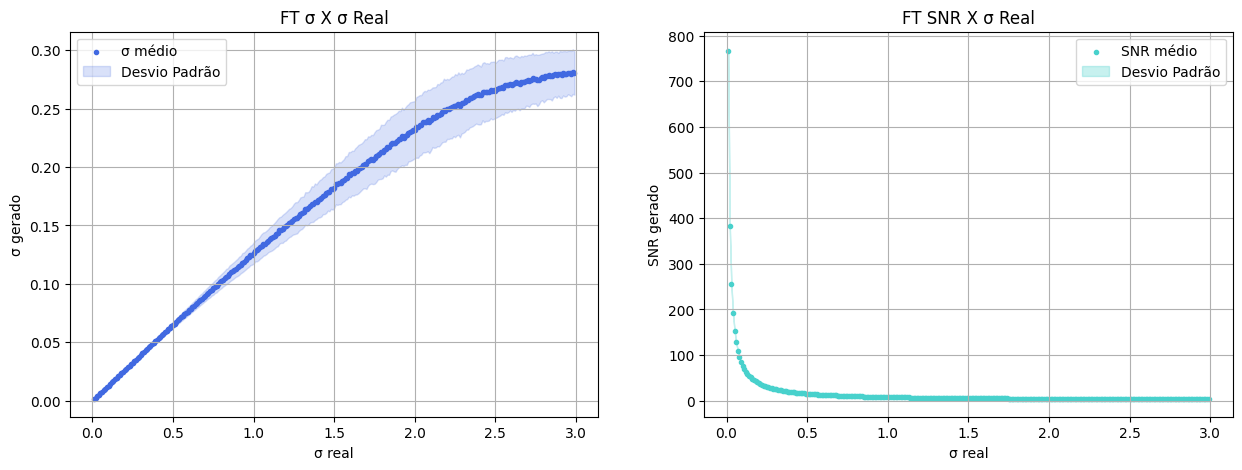

In [17]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.scatter(sample_sigmas, avg_gen_fft_sigmas, c = "royalblue", marker= ".", label = "σ médio")
plt.fill_between(sample_sigmas, avg_gen_fft_sigmas - sigma_error, avg_gen_fft_sigmas + sigma_error, alpha = 0.2, color = "royalblue", label = "Desvio Padrão")
plt.title("FT σ X σ Real")
plt.xlabel("σ real")
plt.ylabel("σ gerado")
plt.legend()
plt.grid(True)

plt.subplot(122)
plt.scatter(sample_sigmas, avg_snrs, c = "mediumturquoise", marker= ".", label = "SNR médio")
plt.fill_between(sample_sigmas, avg_snrs - snr_error, avg_snrs + snr_error, alpha = 0.3, color = "mediumturquoise", label = "Desvio Padrão")
plt.title("FT SNR X σ Real")
plt.xlabel("σ real")
plt.ylabel("SNR gerado")
plt.legend()
plt.grid(True)

In [18]:
print((1.0/avg_gen_fft_sigmas)[sample_sigmas == 2.5])

[3.76600771]


## Modelling the curve

In [19]:
from scipy.optimize import curve_fit

In [20]:
def model_function(x, a, c):
    b = np.log(a)
    return a - np.exp(b - c*x)

def linear(x, a, b):
    return a*x + b

def one_over_x(x, a, b, c):
    return a + b/(x - c)

def cubic_model(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

def logarithm(x, a, b, c):
    return a*np.log(b*x + c)

def exponential(x, a, b, c):
    return c + np.exp(a*x + b)
    


In [21]:
n_div = 10
size_div = int(gen_fft_sigmas.shape[0]/n_div)

a_fft_s, c_fft_s = np.zeros(n_div), np.zeros(n_div)

In [22]:
for i in range(n_div):
    curve_fft = curve_fit(model_function, sample_sigmas, np.average(gen_fft_sigmas[size_div*i: size_div*(i + 1), :], axis=0))
    a_fft_s[i], c_fft_s[i] = curve_fft[0]

In [23]:
a = np.average(a_fft_s), np.std(a_fft_s)
c = np.average(c_fft_s), np.std(c_fft_s)

print(a[0], a[1])
print(c[0], c[1])

0.4935147915609802 0.00234223322864983
0.3059269851116157 0.0019239898238883272


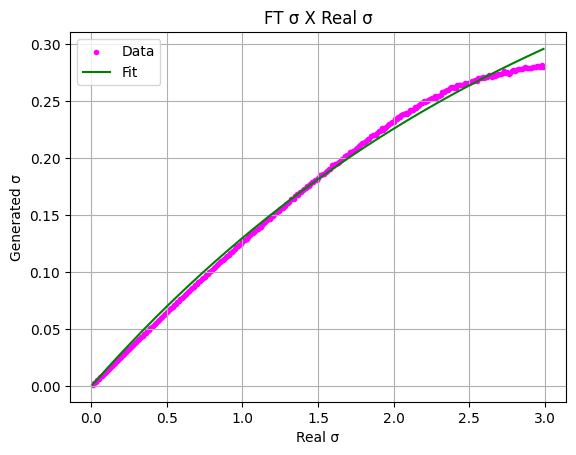

In [24]:
plt.scatter(sample_sigmas, avg_gen_fft_sigmas, c = "magenta", marker= ".", label = "Data")
plt.plot(sample_sigmas, model_function(sample_sigmas, a[0], c[0]), c = "green", label = "Fit")
plt.title("FT σ X Real σ")
plt.xlabel("Real σ")
plt.ylabel("Generated σ")
plt.grid(True)
plt.legend()

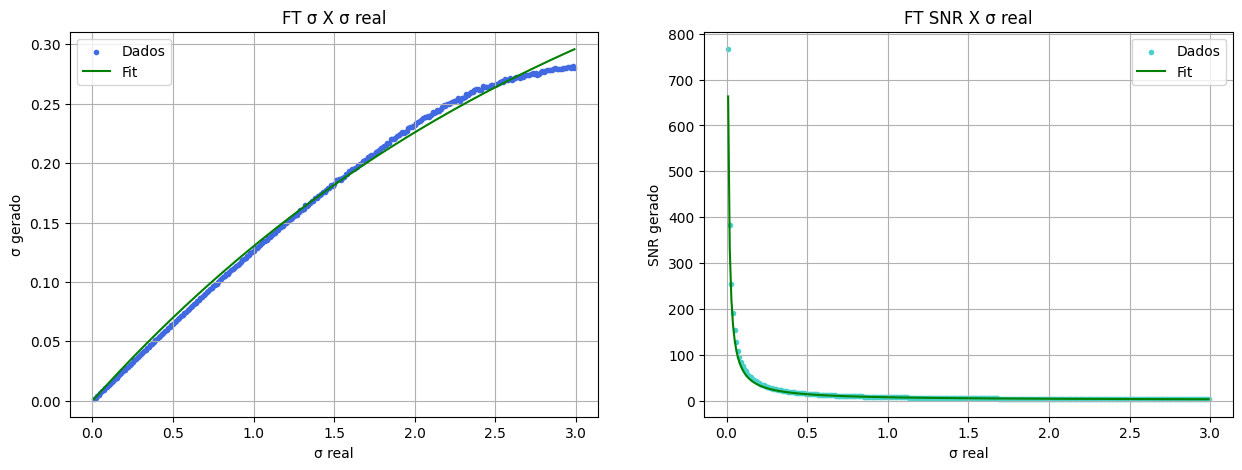

In [25]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.scatter(sample_sigmas, avg_gen_fft_sigmas, c = "royalblue", marker= ".", label = "Dados")
plt.plot(sample_sigmas, model_function(sample_sigmas, a[0], c[0]), c = "green", label = "Fit")
plt.title("FT σ X σ real")
plt.xlabel("σ real")
plt.ylabel("σ gerado")
plt.grid(True)
plt.legend()


plt.subplot(122)
plt.scatter(sample_sigmas, 1.0/avg_gen_fft_sigmas, c = "mediumturquoise", marker= ".", label = "Dados")
plt.plot(sample_sigmas, 1.0/model_function(sample_sigmas, a[0], c[0]), c = "green", label = "Fit")
plt.title("FT SNR X σ real")
plt.xlabel("σ real")
plt.ylabel("SNR gerado")
plt.grid(True)
plt.legend()

With all the model function parameters, it is possible to create an estimator for what value should the real $\sigma$ take to correspond to a given SNR: 

In [26]:
def inverse_model_function(y, a, c):
    b = np.log(a)
    return (b - np.log(a - y))/c

def snr_to_sigma(snr : float, a : float, c : float):
    given_sigma = 1.0/snr
    return inverse_model_function(given_sigma, a, c)

To check whether it is working properly or not, it is suggested to test it:

In [27]:
target_snrs = np.arange(5.0, 1000.0, 5.0)
resulting_snrs = np.zeros((n_avgs, target_snrs.size))
RMSE_vals = np.zeros_like(target_snrs)
avg_snrs = np.zeros_like(target_snrs)
std_snrs = np.zeros_like(target_snrs)


In [28]:
sigmas = snr_to_sigma(target_snrs, a[0], c[0])

In [29]:
if(rerun == True):

    file = open("middle_snr_" + filename_end + ".csv", "w")
    file.write(",".join(f'{x:.6f}' for x in sigmas) + "\n")

    for j in range(n_avgs):
        for i in range(sigmas.size):
            corrup = pymri.corrupted_snr(sig, center, sigmas[i])

            sig_fft = fftshift(fft(corrup, corrup.size))
            
            P_fft = np.nanmax(sig_fft)
            sig_fft = sig_fft/P_fft # Normalization addition to work with highest peak = 1.0

            resulting_snrs[j, i] = pymri.snr(sig_fft)

        file.write(",".join(str(x) for x in resulting_snrs[j,:]) + "\n")

    file.close()



In [30]:
# If simulation is lost
if(rerun == False):
    sig_rel = pd.read_csv("middle_snr_" + filename_end + ".csv")

    sigmas = sig_rel.keys().to_numpy(dtype=np.float64)
    resulting_snrs = sig_rel.values


In [31]:
for i in range(target_snrs.size):
    RMSE_vals[i] = RMSE(np.tile(target_snrs[i], n_avgs), resulting_snrs[:, i])
    avg_snrs[i] = np.sum(resulting_snrs[:, i])/n_avgs

avg_snrs_error = np.std(resulting_snrs, axis = 0)

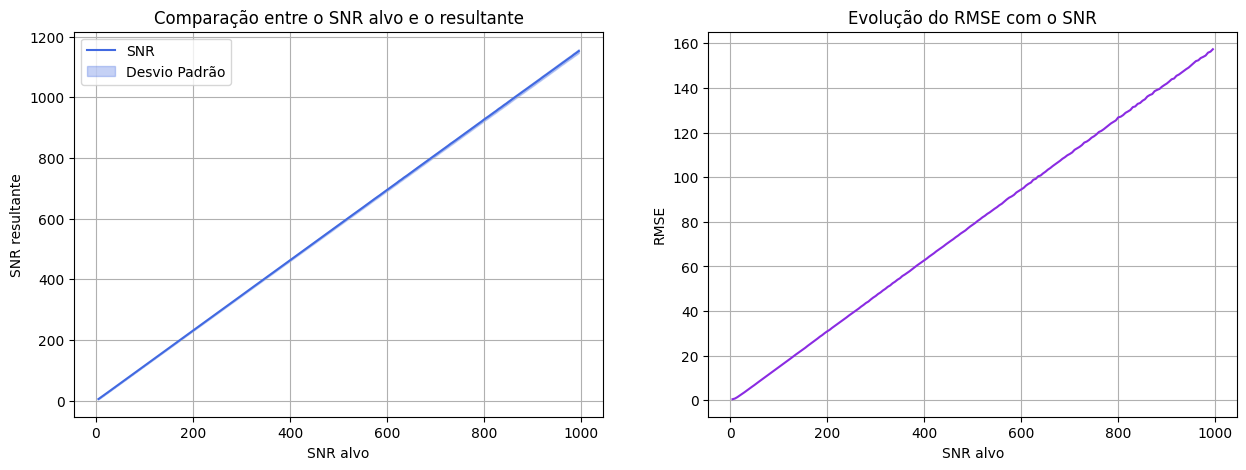

In [32]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(target_snrs, avg_snrs, c = "royalblue", label = "SNR")
plt.fill_between(target_snrs, avg_snrs - avg_snrs_error, avg_snrs + avg_snrs_error, alpha = 0.3, color = "royalblue", label = "Desvio Padrão")
plt.title("Comparação entre o SNR alvo e o resultante")
plt.xlabel("SNR alvo")
plt.ylabel("SNR resultante")
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(target_snrs, RMSE_vals, c = "blueviolet")
plt.title("Evolução do RMSE com o SNR")
plt.xlabel("SNR alvo")
plt.ylabel("RMSE")
plt.grid()

It can be noticed that there is a difference between a given sigma and its resulting one, but as their relation is linear, a linear curve can be fit and its parameters discovered, so a correction is applied:

In [33]:
def linear(x, a, b):
    return a*x + b

In [34]:
n_div = 10

size_div = int(resulting_snrs.shape[0]/n_div)

d_fft_s, e_fft_s = np.zeros(n_div), np.zeros(n_div)

In [35]:
for i in range(n_div):
    curve_fft = curve_fit(linear, target_snrs, np.average(resulting_snrs[size_div*i: size_div*(i + 1), :], axis=0))
    d_fft_s[i], e_fft_s[i] = curve_fft[0]

In [36]:
d = np.average(d_fft_s), np.std(d_fft_s)
e = np.average(e_fft_s), np.std(e_fft_s)

print(d[0], d[1])
print(e[0], e[1])

1.1590522266759649 0.00010226500977286893
-1.0029749238349337 0.032606022203370645


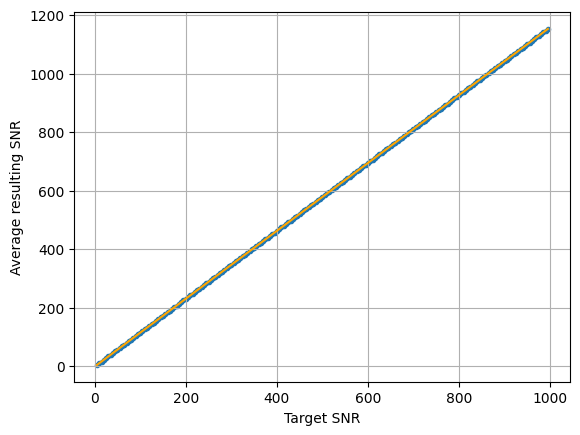

In [37]:
plt.scatter(target_snrs, avg_snrs, marker = ".")
plt.plot(target_snrs, linear(target_snrs, d[0], e[0]), c = "orange")
plt.xlabel("Target SNR")
plt.ylabel("Average resulting SNR")
plt.grid(True)

In [38]:
def snr_to_sigma(snr : float, a : float, c : float, d : float, e : float):
    """Returns a sigma value that will approximately corresponds to a given SNR value.
    
    Parameters
    ----------
    
    snr : float
        Desired SNR value.
    expected_peak : float
        The signal's expected peak."""

    # actual_snr = (np.log(snr) - b_exp)/a_exp
    actual_snr = (snr - e)/d # Linear correction (inverse of the linear function)
    given_sigma = 1.0/actual_snr

    b = np.log(a)
    return (b - np.log(a - given_sigma))/c # inverse of the model function

Now that the `snr_to_sigma` function is corrected, it is possible to test it:

In [39]:
resulting_snrs_correct = np.zeros((n_avgs, target_snrs.size))
RMSE_vals_correct = np.zeros_like(target_snrs)
avg_snrs_correct = np.zeros_like(target_snrs)

In [40]:
sigma = snr_to_sigma(300.0, a[0], c[0], d[0], e[0])

sigmas = snr_to_sigma(target_snrs, a[0], c[0], d[0], e[0])

In [41]:
if(rerun == True):

    file = open("final_snr_" + filename_end + ".csv", "w")
    file.write(",".join(f'{x:.6f}' for x in sigmas) + "\n")

    for j in range(n_avgs):
        for i in range(target_snrs.size):
            corrup = pymri.corrupted_snr(sig, center, sigmas[i])

            sig_fft = fftshift(fft(corrup, corrup.size))
            P_fft = np.nanmax(sig_fft)
            sig_fft = sig_fft/P_fft
            
            resulting_snrs_correct[j, i] = pymri.snr(sig_fft) 

        file.write(",".join(str(x) for x in resulting_snrs_correct[j,:]) + "\n")

    file.close()

In [42]:
# If simulation is lost
if(rerun == False):
    sig_rel = pd.read_csv("final_snr_" + filename_end + ".csv")

    sigmas = sig_rel.keys().to_numpy(dtype=np.float64)
    resulting_snrs_correct = sig_rel.values

In [43]:
for i in range(target_snrs.size):
    RMSE_vals_correct[i] = RMSE(np.tile(target_snrs[i], n_avgs), resulting_snrs_correct[:, i])
    avg_snrs_correct[i] = np.sum(resulting_snrs_correct[:, i])/n_avgs

avg_snrs_error_correct = np.std(resulting_snrs_correct, axis = 0)

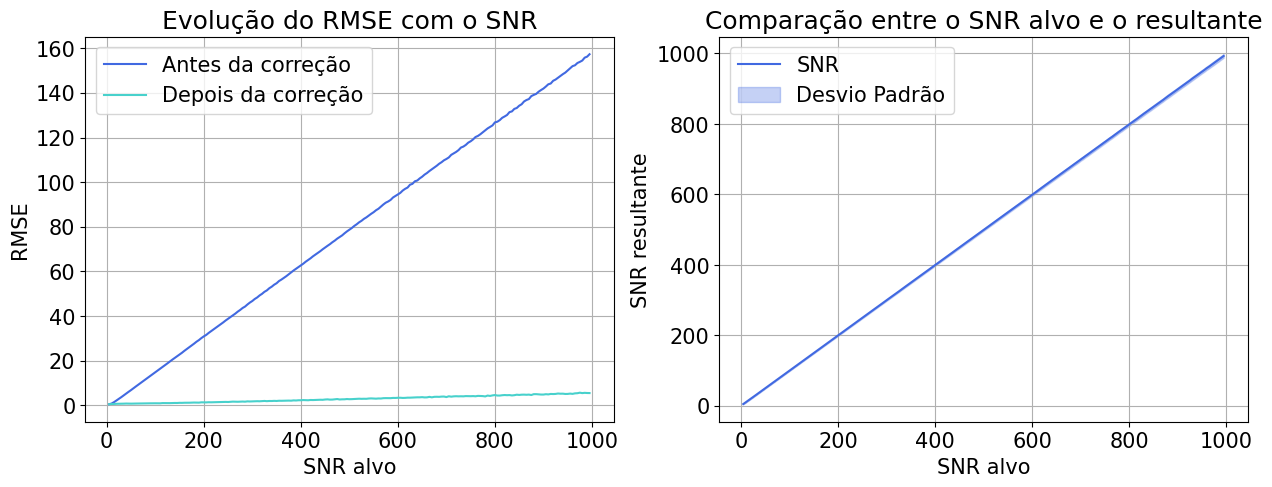

In [44]:
plt.rcParams.update({'font.size': 15})


plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(target_snrs, RMSE_vals, c = "royalblue", label = "Antes da correção")
plt.plot(target_snrs, RMSE_vals_correct, c = "mediumturquoise", label = "Depois da correção")
plt.title("Evolução do RMSE com o SNR")
plt.xlabel("SNR alvo")
plt.ylabel("RMSE")
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(target_snrs, avg_snrs_correct, c = "royalblue", label = "SNR")
plt.fill_between(target_snrs, avg_snrs_correct - avg_snrs_error_correct, avg_snrs_correct + avg_snrs_error_correct, alpha = 0.3, color = "royalblue", label = "Desvio Padrão")
plt.title("Comparação entre o SNR alvo e o resultante")
plt.xlabel("SNR alvo")
plt.ylabel("SNR resultante")
plt.legend()
plt.grid()

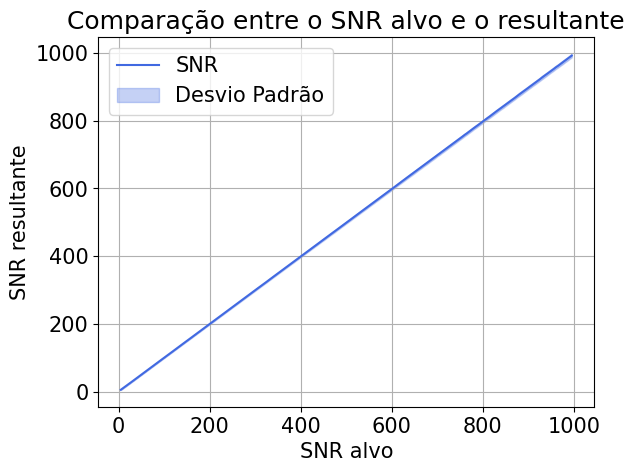

In [45]:
# plt.figure(figsize=(15, 5))
plt.plot(target_snrs, avg_snrs_correct, c = "royalblue", label = "SNR")
plt.fill_between(target_snrs, avg_snrs_correct - avg_snrs_error_correct, avg_snrs_correct + avg_snrs_error_correct, alpha = 0.3, color = "royalblue", label = "Desvio Padrão")
plt.title("Comparação entre o SNR alvo e o resultante")
plt.xlabel("SNR alvo")
plt.ylabel("SNR resultante")
plt.legend()
plt.grid()

In [46]:
sigma = snr_to_sigma(900.0, a[0], c[0], d[0], e[0])

In [47]:
corrup = pymri.corrupted_snr(sig, center, sigma)

sig_fft = fftshift(fft(corrup, corrup.size))
resulting_snr = pymri.snr(sig_fft)

In [48]:
print(resulting_snr)

905.4164540168115
